In [2]:
import miceforest as mf
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [3]:
col_names = ['Well_id','Reservoir Pressure','ISIP','Closure Pressure','PAD Volume','Fluid Efficiency','Transmissibility','Total Prop Mass','Max Prop Conc']
test = pd.read_csv("/home/man/Desktop/dataset.csv",sep=',', header = 0, decimal='.', names=col_names, usecols=col_names)
ds_amp = pd.DataFrame(data=test)
ds_amp

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
0,0,1250.50,2129.5,1861.0,4.892,0.149,12.685,16787.317,7.0
1,2,946.75,2850.5,2413.5,5.005,0.240,10.236,14543.000,5.0
2,3,1515.00,3782.5,3054.5,4.995,0.100,10.667,14366.000,5.0
3,4,2390.55,3449.5,3048.0,4.457,0.040,10.765,15406.000,5.0
4,8,655.95,NaN,2290.0,3.563,0.080,12.254,15504.917,7.0
5,9,1837.95,4592.5,3053.0,4.988,0.360,10.404,14162.417,5.0
6,10,927.00,3503.0,2331.0,4.404,0.290,10.986,16674.917,5.0
7,11,1634.70,3758.5,2694.5,4.988,0.020,12.067,12597.417,5.0
8,12,1318.15,4253.0,3202.5,4.628,0.160,10.248,11694.583,5.0
9,13,1140.40,3062.0,2369.0,4.454,0.090,13.169,15655.500,5.0


In [4]:
# Create kernel. 
kernel = mf.ImputationKernel(
  ds_amp,
  datasets=4,
  save_all_iterations=True,
  random_state=1991
)
#help(mf.ImputationKernel)
# Run the MICE algorithm for 3 iterations
kernel.mice(iterations=4,boosting='gbdt', min_sum_hessian_in_leaf=0.01, n_estimators=50)
completed_dataset = kernel.complete_data(dataset=0, inplace=False)
completed_dataset.head(20)

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
0,0,1250.50,2129.5,1861.0,4.892,0.149,12.685,16787.317,7.0
1,2,946.75,2850.5,2413.5,5.005,0.240,10.236,14543.000,5.0
2,3,1515.00,3782.5,3054.5,4.995,0.100,10.667,14366.000,5.0
3,4,2390.55,3449.5,3048.0,4.457,0.040,10.765,15406.000,5.0
4,8,655.95,2850.5,2290.0,3.563,0.080,12.254,15504.917,7.0
5,9,1837.95,4592.5,3053.0,4.988,0.360,10.404,14162.417,5.0
6,10,927.00,3503.0,2331.0,4.404,0.290,10.986,16674.917,5.0
7,11,1634.70,3758.5,2694.5,4.988,0.020,12.067,12597.417,5.0
8,12,1318.15,4253.0,3202.5,4.628,0.160,10.248,11694.583,5.0
9,13,1140.40,3062.0,2369.0,4.454,0.090,13.169,15655.500,5.0


In [5]:
# Using the first ImputationKernel in kernel to tune parameters
# with the default settings.
optimal_parameters, losses = kernel.tune_parameters(
  dataset=0,
  optimization_steps=10
)
# Run mice with our newly tuned parameters.
kernelmeanmatch = mf.ImputationKernel(ds_amp, datasets=3,mean_match_candidates=10)
kernelmodeloutput = mf.ImputationKernel(ds_amp, datasets=3,mean_match_candidates=0)
kernelmeanmatch.mice(iterations=9, boosting='gdbt', variable_parameters=optimal_parameters)
kernelmodeloutput.mice(iterations=9, boosting='gdbt', variable_parameters=optimal_parameters)

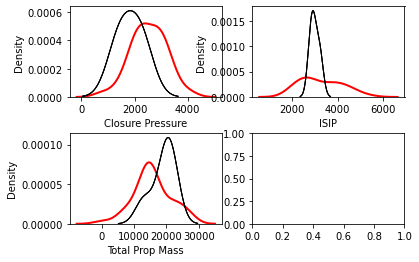

In [6]:
kernelmodeloutput.plot_imputed_distributions(wspace=0.2,hspace=0.4)

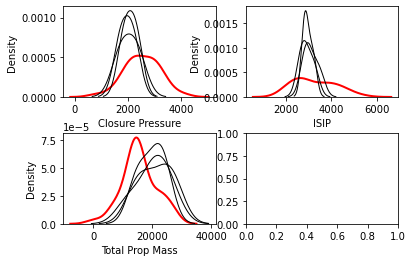

In [7]:
kernelmeanmatch.plot_imputed_distributions(wspace=0.2,hspace=0.4)

In [8]:
#Ответ:

completed_dataset = kernelmeanmatch.complete_data(dataset=0, inplace=False)
completed_dataset.head(20)

,Well_id,Reservoir Pressure,ISIP,Closure Pressure,PAD Volume,Fluid Efficiency,Transmissibility,Total Prop Mass,Max Prop Conc
0,0,1250.50,2129.5,1861.0,4.892,0.149,12.685,16787.317,7.0
1,2,946.75,2850.5,2413.5,5.005,0.240,10.236,14543.000,5.0
2,3,1515.00,3782.5,3054.5,4.995,0.100,10.667,14366.000,5.0
3,4,2390.55,3449.5,3048.0,4.457,0.040,10.765,15406.000,5.0
4,8,655.95,2850.5,2290.0,3.563,0.080,12.254,15504.917,7.0
5,9,1837.95,4592.5,3053.0,4.988,0.360,10.404,14162.417,5.0
6,10,927.00,3503.0,2331.0,4.404,0.290,10.986,16674.917,5.0
7,11,1634.70,3758.5,2694.5,4.988,0.020,12.067,12597.417,5.0
8,12,1318.15,4253.0,3202.5,4.628,0.160,10.248,11694.583,5.0
9,13,1140.40,3062.0,2369.0,4.454,0.090,13.169,15655.500,5.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = completed_dataset

<AxesSubplot:>

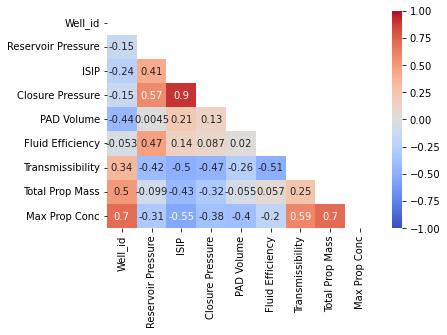

In [11]:
upp_mat = np.triu(df.corr())
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)

In [29]:
#проверим, правильно ли считает seaborn, и что вообще он считает. Проверим, что он считает корреляционный коэффициент Пирсона
ro_xy = df[['Reservoir Pressure', 'Max Prop Conc']].cov().iloc[0,1] / (df['Reservoir Pressure'].std()*df['Max Prop Conc'].std())
ro_xy

-0.312777200965916

# Из тепловой карты можно получить новую связь - между ISIP и давленим жидкости, когда трещина полностью закрывается